# Feature Scaling

With any distance based machine learning model (regularized regression methods, neural networks, and now kmeans), you will want to scale your data.

If you have some features that are on completely different scales, this can greatly impact the clusters you get when using K-Means.

In this notebook, you will get to see this first hand. To begin, let's read in the necessary libraries.



In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing as p

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
import helper2 as h
import tests as t


# Create the dataset for the notebook
data = h.simulate_data(200, 2, 4)
df = pd.DataFrame(data)
df.columns = ['height', 'weight']
df['height'] = np.abs(df['height']*100)
df['weight'] = df['weight'] + np.random.normal(50, 10, 200)
plt.style.use('dark_background')

In [9]:
df.describe()

,height,weight
count,200.000000,200.000000
mean,569.726207,53.130326
std,246.966215,12.245446
min,92.998481,15.782062
25%,357.542793,45.966724
50%,545.766752,53.657961
75%,773.310607,60.823710
max,1096.222348,88.673834


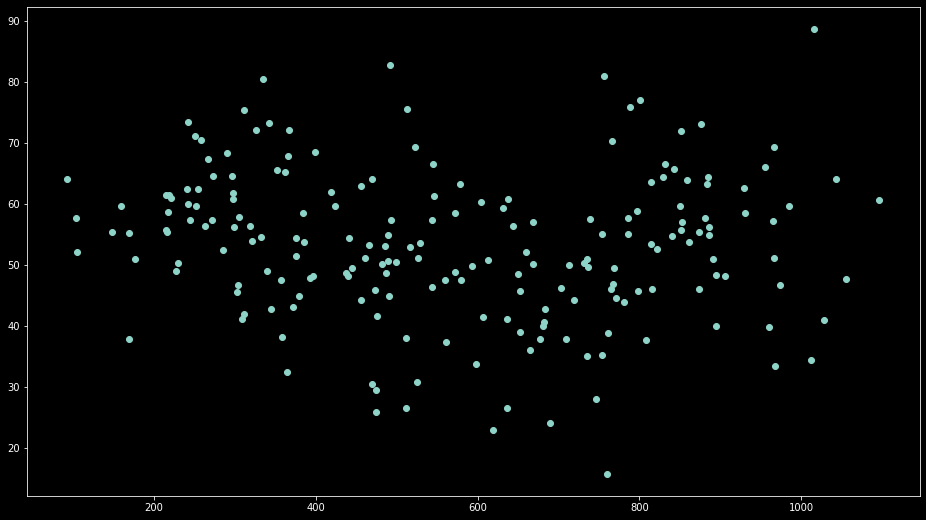

In [10]:
plt.scatter(df['height'], df['weight']);

# Now that we've got a dataset, let's look at some options for scaling the data. As well as how the data might be scaled. There are two very common types of feature scaling that we should discuss:

I. MinMaxScaler

In some cases it is useful to think of your data in terms of the percent they are as compared to the maximum value. In these cases, you will want to use MinMaxScaler.

II. StandardScaler

Another very popular type of scaling is to scale data so that it has mean 0 and variance 1. In these cases, you will want to use StandardScaler.

It is probably more appropriate with this data to use StandardScaler. However, to get practice with feature scaling methods in python, we will perform both.

2. First let's fit the StandardScaler transformation to this dataset. I will do this one so you can see how to apply preprocessing in sklearn.

In [11]:
df_ss = p.StandardScaler().fit_transform(df) # Fit and transform the data

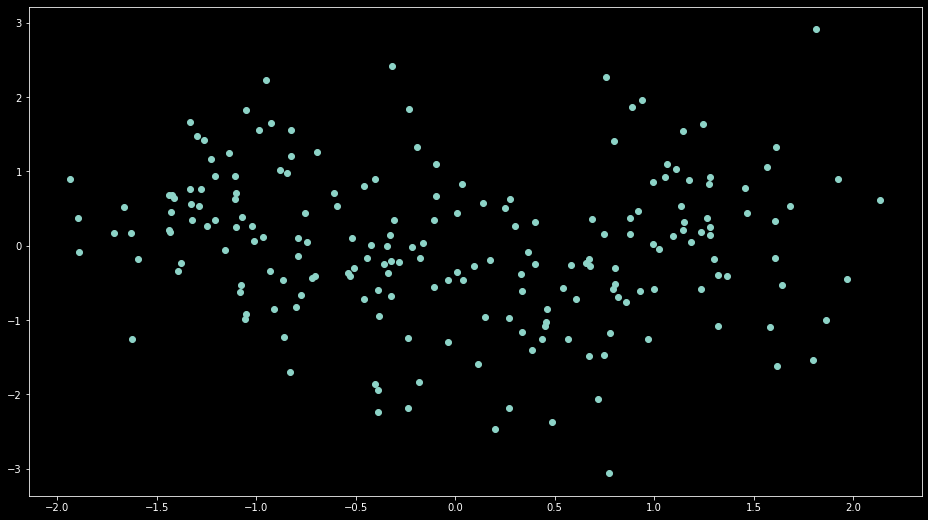

In [12]:
df_ss = pd.DataFrame(df_ss) #create a dataframe
df_ss.columns = ['height', 'weight'] #add column names again

plt.scatter(df_ss['height'], df_ss['weight']); # create a plot

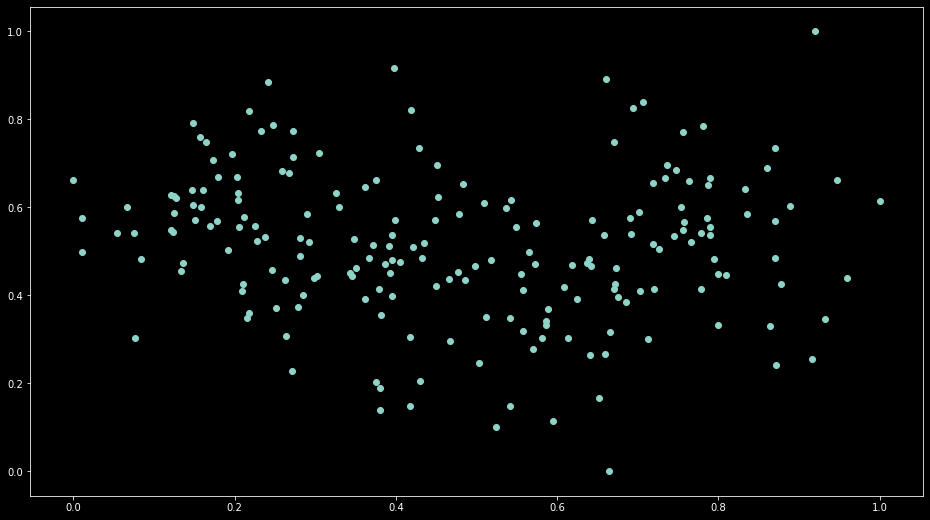

In [13]:
df_mm = p.MinMaxScaler().fit_transform(df) # fit and transform
df_mm = pd.DataFrame(df_mm) #create a dataframe
df_mm.columns = ['height', 'weight'] #change the column names

plt.scatter(df_mm['height'], df_mm['weight']); #plot the data


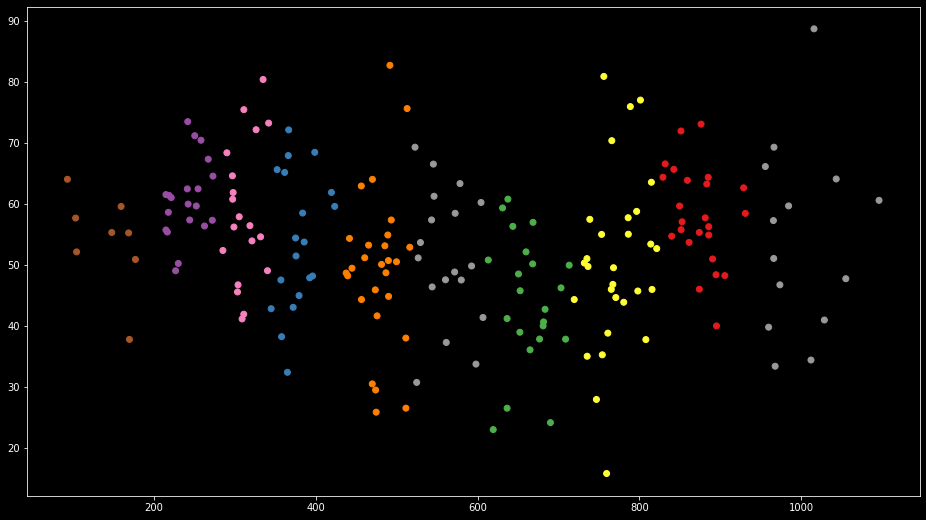

In [14]:
def fit_kmeans(data, centers):
    '''
    INPUT:
        data = the dataset you would like to fit kmeans to (dataframe)
        centers = the number of centroids (int)
    OUTPUT:
        labels - the labels for each datapoint to which group it belongs (nparray)
    
    '''
    kmeans = KMeans(centers)
    labels = kmeans.fit_predict(data)
    return labels

labels = fit_kmeans(df, 10) #fit kmeans to get the labels
    
# Plot the original data with clusters
plt.scatter(df['height'], df['weight'], c=labels, cmap='Set1');


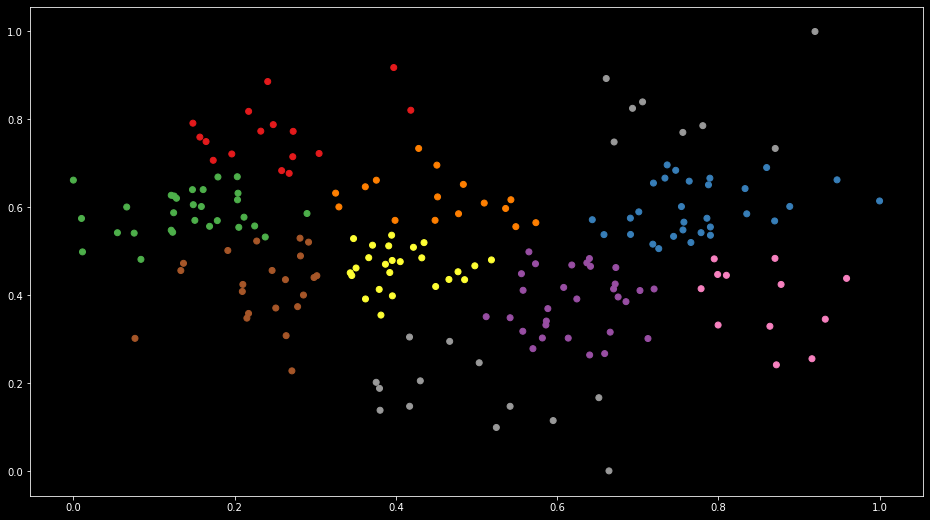

In [15]:
labels = fit_kmeans(df_mm, 10) #fit kmeans to get the labels
    
#plot each of the scaled datasets
plt.scatter(df_mm['height'], df_mm['weight'], c=labels, cmap='Set1');


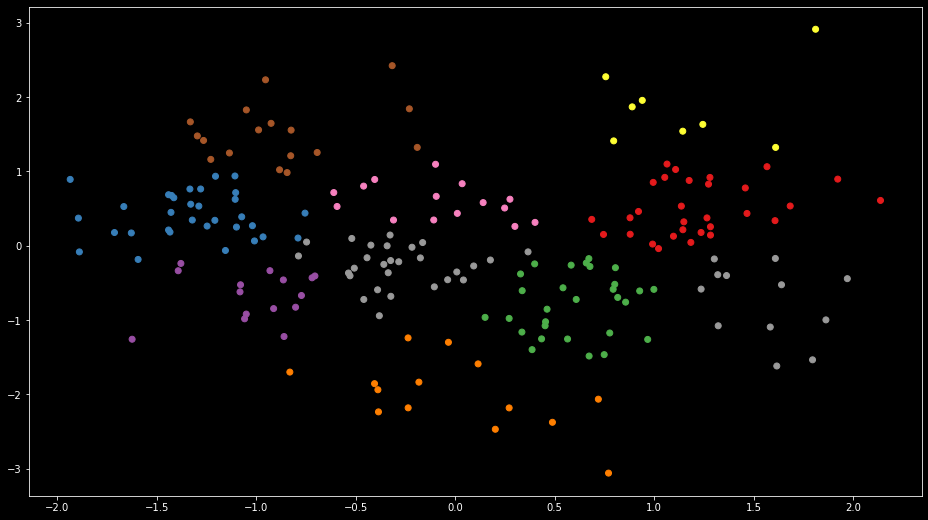

In [16]:
labels = fit_kmeans(df_ss, 10)

plt.scatter(df_ss['height'], df_ss['weight'], c=labels, cmap='Set1');